# Emicool Customer segmentation exercise
### Version 2

Introduction:
* The data which has been used here is only the Commercial sector, and for the month of Feb in years 2017,18,19 and 20.


### How to use the output:
We can use the results in three ways:
 1. Forecasting the data by cluster or group.


 2. Examine the clusters to understand why they are behaving in such way. i.e. why there is high TR with low consumption
  and why low TR could have a high consumption compared to Mid TR (we may increase their TR which will lead to high Fixed     Revenue).
  

 3. Building a EFLH based on the cluster and the unit type could help the technical team to implement demand forecasting 
  in order to reduce power & water consumption.

## Import the relevant libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
from sklearn.cluster import KMeans, MiniBatchKMeans


## Load the data

In [2]:
def read_data():
    global data_2
    data_2 = pd.read_csv ('2017 to 2020 Feb - rth and dl.csv')

In [2]:
data = pd.read_csv ('commercial data feb only 2017 to 2020.csv')

In [3]:
data

,BusinessSector,UsageCode,PropertyId,DL,Billed RTH - MTD,Year
0,Commercial,BUILDING,PI000160,19.55,3208.8898,2017
1,Commercial,BUILDING,PI000160,19.55,2446.8318,2018
2,Commercial,BUILDING,PI000160,19.55,2205.1343,2019
3,Commercial,BUILDING,PI000160,19.55,1194.2700,2020
4,Commercial,BUILDING,PI000990,56.30,978.4484,2017
...,...,...,...,...,...,...
4233,Commercial,Showroom,PI024878,198.60,NaN,2020
4234,Commercial,Stadium,PI014954,200.00,53173.4500,2017
4235,Commercial,Stadium,PI014954,200.00,53599.9750,2018
4236,Commercial,Stadium,PI014954,200.00,59002.6250,2019


## Plot the data

Text(0, 0.5, 'Billed RTH')

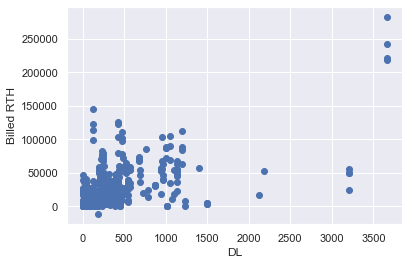

In [3]:
plt.scatter(data['DL'],data['Billed RTH - MTD'])
plt.xlabel('DL')
plt.ylabel('Billed RTH')

In [4]:
data.shape

(4238, 6)

## Select the features

In [4]:
x = data[['DL','Billed RTH - MTD']]

### Data Preprocessing

In [5]:
x = x.dropna()

## Clustering

In [24]:
MiniBatchKMeans?

In [6]:
kmeans = KMeans(n_clusters=6, algorithm='full')
kmeans.fit(x)

KMeans(algorithm='full', n_clusters=6)

In [9]:
mini_kmeans = MiniBatchKMeans(n_clusters=6, init='random')
mini_kmeans.fit(x)

MiniBatchKMeans(init='random', n_clusters=6)

## Clustering results

In [10]:
clusters = x.copy()
clusters['cluster_pred']=kmeans.fit_predict(x)

In [11]:
clusters_2 = x.copy()
clusters_2['cluster_pred_2']=mini_kmeans.fit_predict(x)

C:\Users\abdelsalam\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


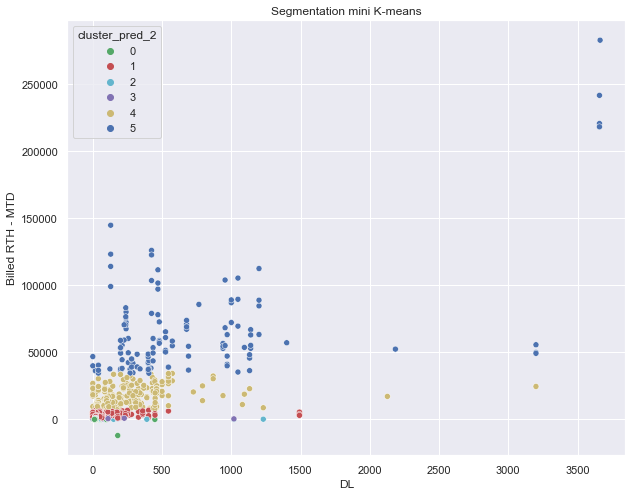

In [12]:
x_axis = clusters_2['DL']
y_axis = clusters_2['Billed RTH - MTD']
plt.figure(figsize = (10, 8))
sns.scatterplot(x_axis, y_axis, hue = clusters_2['cluster_pred_2'], palette = ['g', 'r', 'c', 'm', 'y','b'])
plt.title('Segmentation mini K-means')
plt.show()

C:\Users\abdelsalam\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


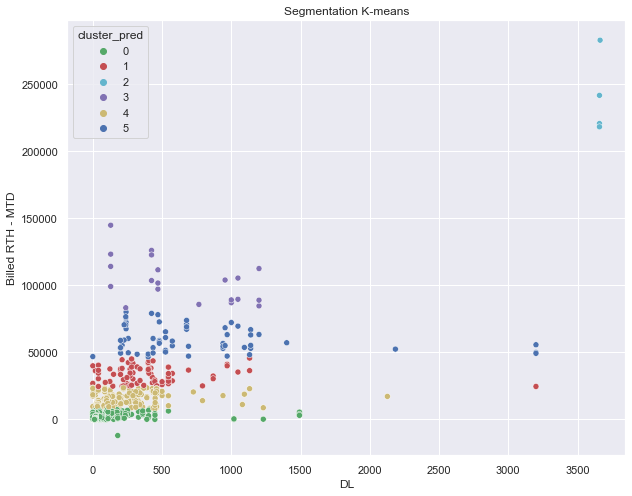

In [23]:
x_axis = clusters['DL']
y_axis = clusters['Billed RTH - MTD']
plt.figure(figsize = (10, 8))
sns.scatterplot(x_axis, y_axis, hue = clusters['cluster_pred'], palette = ['g', 'r', 'c', 'm', 'y','b'])
plt.title('Segmentation K-means')
plt.show()

## Standardize the variables

In [13]:
from sklearn import preprocessing
x_scaled = preprocessing.scale(x)

## The Elbow method

In [14]:
wcss =[]

for i in range(1,11):
    kmeans = KMeans(i)
    kmeans.fit(x_scaled)
    wcss.append(kmeans.inertia_)
    
wcss

[5710.000000000002,
 2739.643011037774,
 1586.1731394349317,
 1164.8687042643908,
 821.350122409618,
 600.5105131299845,
 478.4226870966955,
 392.6702255557141,
 328.78006743290507,
 286.9827798252483]

Text(0, 0.5, 'WCSS')

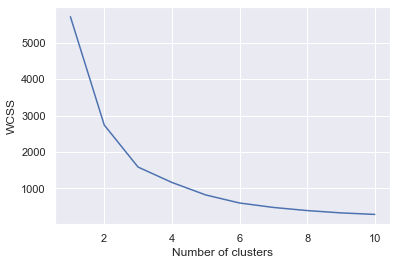

In [15]:
plt.plot(range(1,11),wcss)
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')

## Explore clustering solutions and select the number of clusters

In [16]:
kmeans_new = KMeans(n_clusters=6, random_state=45)
kmeans_new.fit(x_scaled)
clusters_new = x.copy()
clusters_new['cluster_pred'] = kmeans_new.fit_predict(x_scaled)
clusters_new['Unit type'] = data['UsageCode']
clusters_new['Sector'] = data['BusinessSector']
clusters_new['PI'] = data['PropertyId']

In [16]:
clusters_new

,DL,Billed RTH - MTD,cluster_pred,Unit type,Sector
0,19.55,3208.8898,0,BUILDING,Commercial
1,19.55,2446.8318,0,BUILDING,Commercial
2,19.55,2205.1343,0,BUILDING,Commercial
3,19.55,1194.2700,0,BUILDING,Commercial
4,56.30,978.4484,0,BUILDING,Commercial
...,...,...,...,...,...
4230,290.00,17800.3100,4,Showroom,Commercial
4234,200.00,53173.4500,4,Stadium,Commercial
4235,200.00,53599.9750,4,Stadium,Commercial
4236,200.00,59002.6250,1,Stadium,Commercial


C:\Users\abdelsalam\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


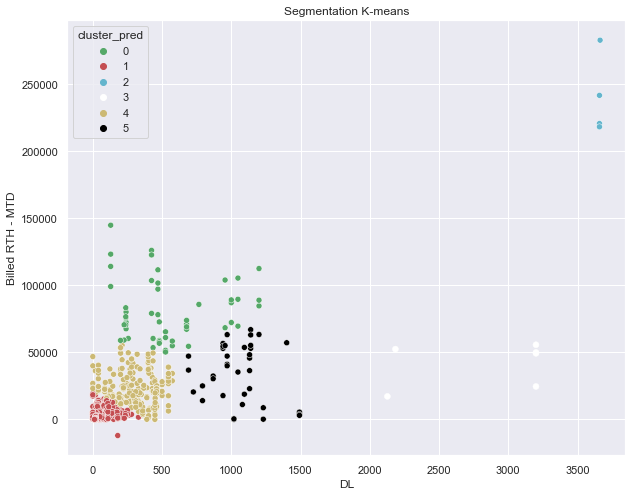

In [17]:
x_axis = clusters_new['DL']
y_axis = clusters_new['Billed RTH - MTD']
plt.figure(figsize = (10, 8))
sns.scatterplot(x_axis, y_axis, hue = clusters_new['cluster_pred'], palette = ['g', 'r', 'c', 'w', 'y','black'])
plt.title('Segmentation K-means')
plt.show()

In [21]:
example = clusters_new.loc[clusters_new['Profile'] == 'Unidentfied']
example.head(20)

,DL,Billed RTH - MTD,Profile,Unit type,Sector,PI


In [18]:
example.to_csv('clustering data group 3.csv', index=None)

In [19]:
clusters_new['cluster_pred'] = clusters_new['cluster_pred'].map({0:'Mid TR High RTH',
                                                                 1:'Small TR Small RTH',
                                                                 2:'Very High TR Very High RTH',
                                                                 3:'Very High TR Mid RTH',
                                                                 4:'Mid TR Mid RTH',
                                                                  5:'High TR Mid RTH'})

In [20]:
clusters_new = clusters_new.rename({'cluster_pred':'Profile'}, axis=1)

In [22]:
summary = clusters_new.copy()
summary = summary.groupby(['Profile']).sum()
summary['N Obs'] = clusters_new[['Profile','PI']].groupby(['Profile']).count()
summary['Prop Obs'] = summary['N Obs'] / summary['N Obs'].sum()
summary['Prop Obs'] = summary['Prop Obs'].apply(lambda x: '{:.2%}'.format(x))
summary['Total DL Prop'] = summary['DL'] / summary['DL'].sum()
summary['Total DL Prop'] = summary['Total DL Prop'].apply(lambda x: '{:.2%}'.format(x))
summary['Total RTH Prop'] = summary['Billed RTH - MTD'] / summary['Billed RTH - MTD'].sum()
summary['Total RTH Prop'] = summary['Total RTH Prop'].apply(lambda x: '{:.2%}'.format(x))
summary['Avg DL (row)'] = clusters_new[['Profile','DL']].groupby(['Profile']).mean()
summary['Avg DL (row)'] = summary['Avg DL (row)'].apply(lambda x: '{:,.2f}'.format(x))
summary['Avg RTH (row)'] = clusters_new[['Profile','Billed RTH - MTD']].groupby(['Profile']).mean()
summary['Avg RTH (row)'] = summary['Avg RTH (row)'].apply(lambda x: '{:,.2f}'.format(x))
summary['DL'] = summary['DL'].apply(lambda x: '{:,.2f}'.format(x))
summary['Billed RTH - MTD'] = summary['Billed RTH - MTD'].apply(lambda x: '{:,.2f}'.format(x))
summary

,DL,Billed RTH - MTD,N Obs,Prop Obs,Total DL Prop,Total RTH Prop,Avg DL (row),Avg RTH (row)
Profile,,,,,,,,
High TR Mid RTH,"43,254.80","1,358,984.20",41,1.44%,19.66%,8.92%,"1,055.00","33,145.96"
Mid TR High RTH,"29,768.98","4,339,055.10",54,1.89%,13.53%,28.49%,551.28,"80,352.87"
Mid TR Mid RTH,"66,025.33","5,221,376.25",225,7.88%,30.01%,34.28%,293.45,"23,206.12"
Small TR Small RTH,"49,212.10","3,097,451.21",2525,88.44%,22.37%,20.34%,19.49,"1,226.71"
Very High TR Mid RTH,"17,112.00","249,460.49",6,0.21%,7.78%,1.64%,"2,852.00","41,576.75"
Very High TR Very High RTH,"14,638.50","963,796.82",4,0.14%,6.65%,6.33%,"3,659.62","240,949.21"


In [91]:
clusters_new.describe()

,DL,Billed RTH - MTD
count,2855.000000,2855.000000
mean,77.061894,5334.544332
std,254.104801,16463.200287
min,0.000000,-11965.362700
25%,3.000000,144.307650
50%,6.900000,564.434800
75%,36.705000,1958.176300
max,3663.000000,282934.022300


C:\Users\abdelsalam\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


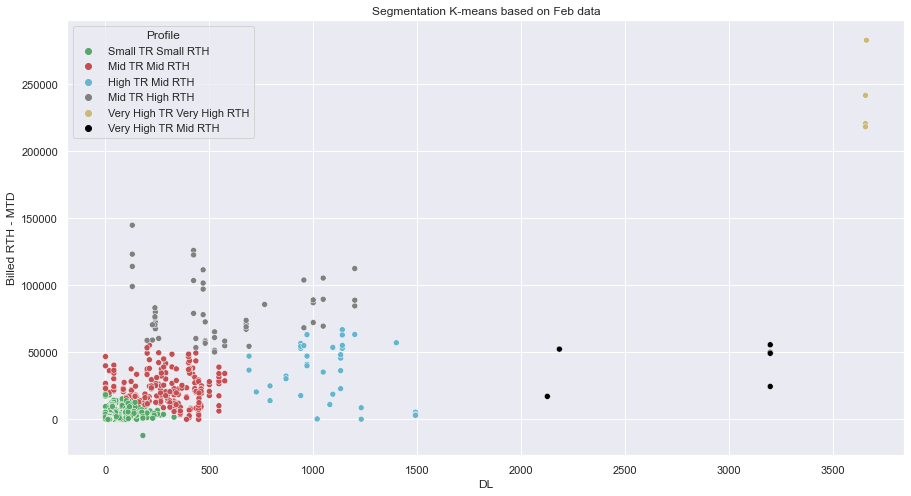

In [29]:
x_axis = clusters_new['DL']
y_axis = clusters_new['Billed RTH - MTD']
plt.figure(figsize = (15, 8))
sns.scatterplot(x_axis, y_axis, hue = clusters_new['Profile'], palette = ['g', 'r', 'c', 'grey', 'y','black'])
plt.title('Segmentation K-means based on Feb data')
#plt.show()
plt.savefig('Customer Profiling.png', dpi=130)